In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split,learning_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from joblib import dump, load



In [ ]:
df= pd.read_csv('../csv/after_cleaning/mubawab_tayara_menzili_final.csv')
df.head()

,delegation,superficie,nb_pieces,chambres,salle_de_bains,etage,gouvernorat_ariana,gouvernorat_ben-arous,gouvernorat_la-manouba,gouvernorat_tunis,prix
0,9.0,88.0,3.0,2,1,1,0.0,0.0,0.0,1.0,340000.0
1,23.0,100.0,2.0,2,1,1,0.0,0.0,0.0,1.0,135000.0
2,33.0,152.0,2.0,2,1,1,0.0,0.0,0.0,1.0,680000.0
3,33.0,120.0,2.0,1,1,1,0.0,0.0,0.0,1.0,470000.0
4,28.0,145.0,4.0,3,1,4,0.0,0.0,0.0,1.0,260000.0


**scaling and train test split**

In [4]:
X= df.drop(columns='prix')

y= df['prix']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler to the test data (do not fit again!)
X_test_scaled = scaler.transform(X_test)


# Support Vector Regression

Support Vector regression is a type of Support vector machine that supports linear and non-linear regression. 

As it seems in the below graph, the mission is to fit as many instances as possible between the lines while limiting the margin violations.

**most important SVR parameter is Kernel type. It can be :
linear,rbf, polynomial or sigmoid.**

RBF kernel:

Default choice for non-linear problems in SVMs.

Captures complex relationships without prior knowledge of data.

Sensitive to hyperparameter tuning, especially gamma.


In [6]:

param_grid = {
    'C': [0.1, 1, 10, 100, 1000, 10000],  
    'gamma': [0.001, 0.01, 0.1, 0.5, 1],  
    'epsilon': [0.01, 0.1, 0.2, 0.5]  
}

svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 10000, 'epsilon': 0.01, 'gamma': 0.1}


C parameter: C determines how many data samples are allowed to be placed in different classes. 

If the value of C is set to a low value, the probability of the outliers is increased, and the general decision boundary is found. 


If the value of C is set high, the decision boundary is found more carefully.

A higher C results in a more complex model (risking overfitting).


A lower C makes the model more tolerant to errors (risking underfitting).






In [7]:
regressor = SVR(kernel='rbf', **grid_search.best_params_)
regressor.fit(X_train_scaled,y_train)

y_hat= regressor.predict(X_test_scaled)

In [8]:
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
mape=mean_absolute_percentage_error(y_test, y_hat)
r2= r2_score(y_test, y_hat)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R²: {r2}")

Mean Absolute Error (MAE): 111537.08926560507
Root Mean Squared Error (RMSE): 186257.35513963574
Mean Squared Error (MSE): 34691802343.61239
Mean Absolute Percentage Error (MAPE): 0.2903343346629433
R²: 0.7097963990591027


In [9]:
y_train_pred = regressor.predict(X_train_scaled)
y_test_pred = regressor.predict(X_test_scaled)

# Train metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Test metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display results
print("===== Training Metrics =====")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_train:.4f}")
print(f"R²: {r2_train:.4f}")

print("\n===== Testing Metrics =====")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.4f}")
print(f"R²: {r2_test:.4f}")


===== Training Metrics =====
Mean Absolute Error (MAE): 110671.2884
Root Mean Squared Error (RMSE): 221127.0996
Mean Squared Error (MSE): 48897194165.8279
Mean Absolute Percentage Error (MAPE): 0.2803
R²: 0.6259

===== Testing Metrics =====
Mean Absolute Error (MAE): 111537.0893
Root Mean Squared Error (RMSE): 186257.3551
Mean Squared Error (MSE): 34691802343.6124
Mean Absolute Percentage Error (MAPE): 0.2903
R²: 0.7098


**R² is around 70% , this means that LR model explains about 70% of the variance in apartment prices.
The higher the R², the better the model’s fit to the data.**


**but difference between train and test is due to C being very high**!


**learning curve**

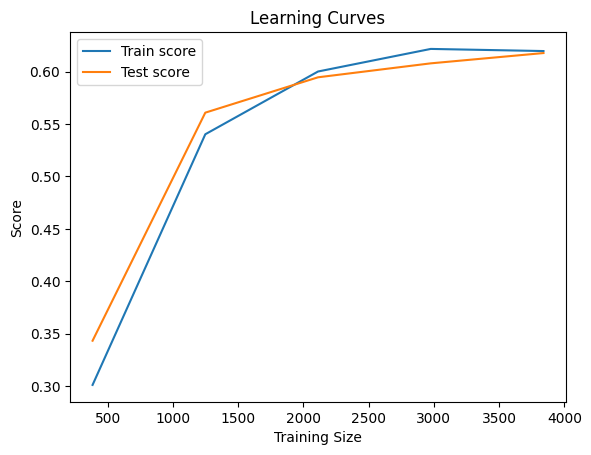

In [10]:

train_sizes, train_scores, test_scores = learning_curve(regressor, X_train_scaled, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()


**compress model**

In [11]:
dump(regressor, './compressed_models/svm_model.joblib')


['./compressed_models/svm_model.joblib']

In [12]:
svm_model = load('./compressed_models/svm_model.joblib')


In [13]:
svm_model.predict(X_test_scaled)

array([242177.75643595, 362110.17773914, 270266.93614233, ...,
       907050.08376795, 812407.34323294, 154879.3054594 ])